<center><img src="https://ingenieria2.udea.edu.co/gepp/assets/logo-ingenieria-udea.svg"></center>
---

## Análisis Multivariado de Señales Sismográficas

**Tratamiento de Señales III**

*Presentado por:*

*Luis alberto Ochoa M.*

*Jhon James Tapie P.*

*Prof. Hernán Felipe García Arias*

**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1


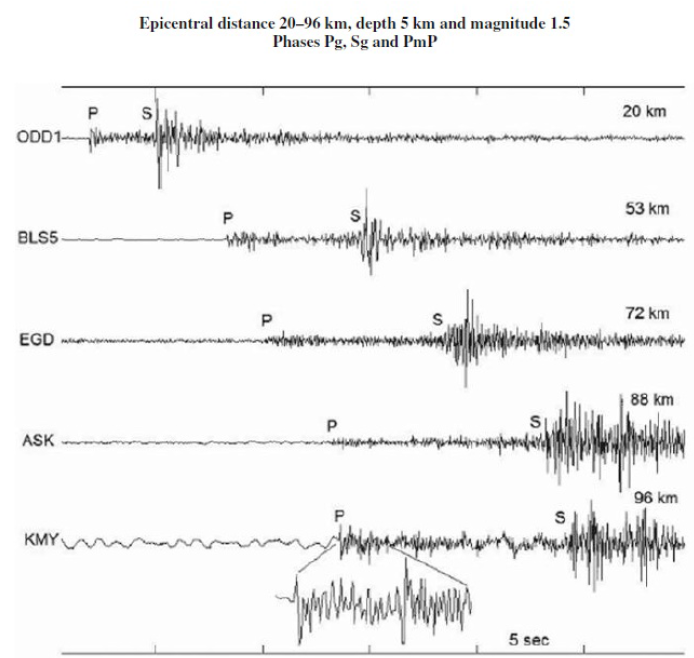

Los observatorios sismológicos clasifican las señales sísmicas de acuerdo a la diferencia de tiempo de arribo entre la onda P y la onda S, conocida como S-P. La S-P, es una indicación de la distancia que existe desde el punto donde se genera el sismo al punto donde se encuentra la estación que lo registra, es decir de la distancia epicentral. Dicho parámetro, aplicado a las señales registradas
por el OSQ permite definir tres tipos de sismos: local, caracterizado por tener una S-P menor a 20 s; regional cuya S-P varía entre 20 s y 180 s y telesismo, cuya S-P es mayor 180 s.

## Análisis Multivariado de Señales Sismográficas

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

2023-1


In [1]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc

## **Almacenamiento de los datos**

Se descargan los archivos sismicos almacenados en el repositorio de GitHub.

In [3]:
!wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisLoc.mat?raw=true" -O "sisLoc.mat"
!wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisReg.mat?raw=true" -O "sisReg.mat"
!wget "https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisTele.mat?raw=true" -O "sisTele.mat"

--2023-03-25 21:02:16--  https://github.com/LuisOchoaM/MiniProyecto1_TS3/blob/main/sisLoc.mat?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/LuisOchoaM/MiniProyecto1_TS3/raw/main/sisLoc.mat [following]
--2023-03-25 21:02:17--  https://github.com/LuisOchoaM/MiniProyecto1_TS3/raw/main/sisLoc.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LuisOchoaM/MiniProyecto1_TS3/main/sisLoc.mat [following]
--2023-03-25 21:02:17--  https://raw.githubusercontent.com/LuisOchoaM/MiniProyecto1_TS3/main/sisLoc.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent

## **Visualización**

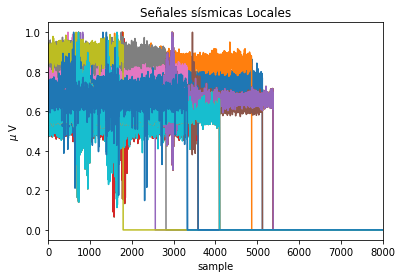

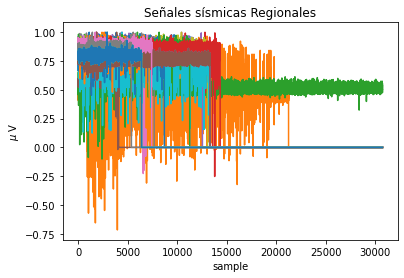

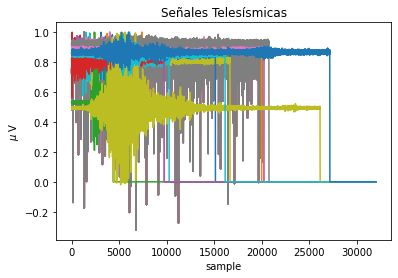

In [4]:
data_Loc = sc.loadmat('sisLoc.mat')
data_Reg = sc.loadmat('sisReg.mat')
data_Tele = sc.loadmat('sisTele.mat')

data_Loc.keys() # variables del diccionario
data_Reg .keys() # variables del diccionario
data_Tele.keys() # variables del diccionario

Y_Loc = data_Loc['Y']
fs_Loc = data_Loc['fs'][0][0]
Y_Reg = data_Reg ['Y']
fs_Reg = data_Reg ['fs'][0][0]
Y_Tele = data_Tele['Y']
fs_Tele = data_Tele['fs'][0][0]

plt.plot(Y_Loc.T)
plt.title("Señales sísmicas Locales")
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.xlim(0,8000)
plt.show()

plt.plot(Y_Reg.T)
plt.title("Señales sísmicas Regionales")
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

plt.plot(Y_Tele.T)
plt.title("Señales Telesísmicas")
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

## **Nivel DC**

Se eliminan todos los 0s que están al final de cada señal y se calcula  la media de cada una de esta, por último se le quita el nivel DC.

In [5]:
data=[]
dataLoc=[]
dataReg=[]
dataTele=[]

# Eliminación de ceros.
for i in range(21):
  data=Y_Loc[i]
  while data[-1] == 0:
     data=data[:-1]

  dataLoc.append(data-np.mean(data))
  data=Y_Reg[i]
  while data[-1] == 0:
     data=data[:-1]

  dataReg.append(data-np.mean(data))
  data=Y_Tele[i]
  while data[-1] == 0:
     data=data[:-1]

  dataTele.append(data-np.mean(data))

#Se guarda una copia de las señales para depues poder compararlas con la señal filtrada.
sismo_Loc=dataLoc
sismo_Reg=dataReg  
sismo_Tele=dataTele

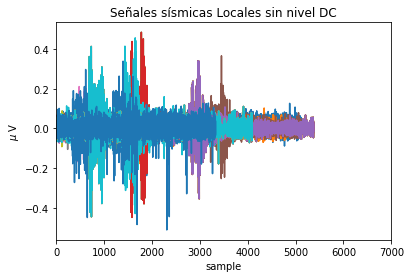

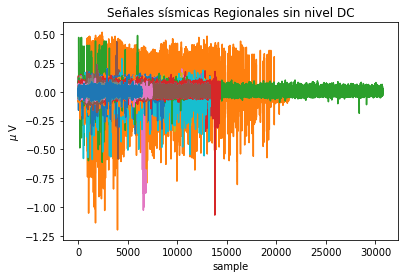

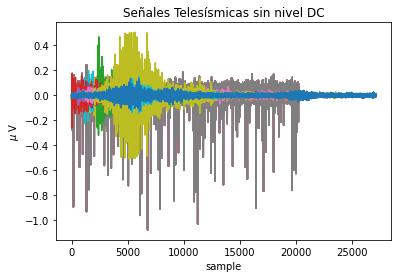

In [6]:
for i in dataLoc:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.xlim(0,7000)
plt.title("Señales sísmicas Locales sin nivel DC")
plt.show()

for i in dataReg:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.title("Señales sísmicas Regionales sin nivel DC")
plt.show()

for i in dataTele:
  plt.plot(i)
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
plt.title("Señales Telesísmicas sin nivel DC")
plt.show()

In [7]:
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import sosfreqz
import numpy as np

## **Filtrado de las señales**

In [8]:
from ipywidgets import interact

interactive(children=(IntSlider(value=10, description='idx', max=20), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=10, description='idx', max=20), Output()), _dom_classes=('widget-interac…

<ipython-input-9-a41be57f2be5>:52: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(np.abs(h))


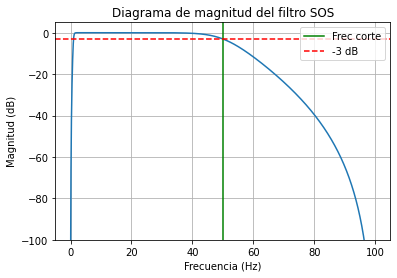

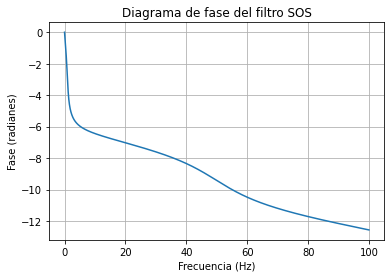

In [9]:
#Señal sin filtrar
@interact(idx = (0,20,1))

def plotSismos(idx):
  
  sampleSignal = sismo_Reg[idx] # se extrae una señal de la base de datos
  plt.figure
  plt.plot(sampleSignal)
  plt.title("Señal sismica sin filtrar")
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.show()

plotSismos  

# Definir la frecuencia de muestreo y la frecuencia de corte
fs = 200 # Hz
fc_H = 50 # Hz
fc_L = 1 # Hz

#Se normalizan las frecuencias con respecto a la frecuencia de muestreo (Fs/2)
fc_H_norm = fc_H/(fs/2) # Hz
fc_L_norm = fc_L/(fs/2) # Hz

#Coeficientes del filtro SOS (Second-Order Sections)
sos = signal.butter(4,[fc_L_norm,fc_H_norm] , btype='band', output='sos') 

#Se filtran todas las señales sismicas.
for i in range(21):
  dataLoc[i] = signal.sosfilt(sos, dataLoc[i])
  dataReg[i] = signal.sosfilt(sos, dataReg[i])
  dataTele[i] = signal.sosfilt(sos, dataTele[i])

#Señal filtrada
@interact(idx = (0,20,1))

def plotSismos(idx):
  
  sampleSignal = dataReg[idx] # se extrae una señal de la base de datos
  plt.figure
  plt.plot(sampleSignal)
  plt.title("Señal sismica filtrada")
  plt.xlabel('sample')
  plt.ylabel('$\mu$ V')
  plt.show()

plotSismos
# Calcular la respuesta en frecuencia del filtro SOS
w, h = sosfreqz(sos, worN=2000)  #worN = numero de puntos de frecuencia

# Calcular la magnitud de la respuesta en frecuencia en dB
mag = 20*np.log10(np.abs(h))

# Graficar el diagrama de magnitud
plt.plot(w/(2*np.pi)*fs, mag)
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.title("Diagrama de magnitud del filtro SOS")
plt.axvline(50, color='green', label="Frec corte") # cutoff frequency
plt.axhline(y=-3, color='red', linestyle='--', label="-3 dB")
plt.legend()
plt.grid(which='both', axis='both')
plt.ylim(-100,5)
plt.show()

# Graficar el diagrama de Fase
plt.plot(fs * w / (2 * np.pi), np.unwrap(np.angle(h)))
plt.title("Diagrama de fase del filtro SOS")
plt.ylabel('Fase (radianes)')
plt.xlabel('Frecuencia (Hz)')
plt.grid(which='both', axis='both')
plt.show()

## **Justificación del Filtro implementado**


El filtro **SOS** es un filtro digital de tipo Butterworth. En este caso, el filtro se utiliza para filtrar señales sísmicas de tipo local, regional y telesísmicas que oscilan entre 1 Hz y 50 Hz.

La justificación para utilizar este filtro se basa en el hecho de que las señales sísmicas de interés para este rango de frecuencia tienen una alta energía y son susceptibles a interferencias de ruido y artefactos. El uso de un filtro de banda pasante permite eliminar frecuencias no deseadas y mejorar la relación señal-ruido de la señal sísmica.

Además, el filtro Butterworth es un tipo de filtro de respuesta suave que tiene una característica de atenuación gradual en la banda de paro, como se puede observar en el diagrama de magnitud, lo que significa que las frecuencias que están fuera de la banda de interés se atenúan gradualmente en lugar de ser cortadas abruptamente. Esto también lo podemos determinar observando el diagrama de fase. Por lo tanto, se reduce el riesgo de introducir distorsiones en la señal y permite conservar las características de la señal sísmica que son relevantes para el análisis posterior.

## **Análisis Espectral Singular (SSA)**

Se ajustan  nuevamente todas las señales a la misma longitud y se agregan a un array para poder realizar el Análisis de espectro singular (SSA).

In [10]:
# Encontrar la longitud máxima de las listas
longitud_maxima1 = max(len(l) for l in dataLoc)
longitud_maxima2 = max(len(l) for l in dataReg)
longitud_maxima3 = max(len(l) for l in dataTele)

# Rellenar las listas más cortass con ceros nuevamente y agregarlas a un arreglo
dataLoc_filter = np.array([np.pad(l, (0, longitud_maxima1 - len(l)), 'constant') for l in dataLoc])
dataReg_filter = np.array([np.pad(l, (0, longitud_maxima2 - len(l)), 'constant') for l in dataReg])
dataTele_filter = np.array([np.pad(l, (0, longitud_maxima3 - len(l)), 'constant') for l in dataTele])

In [11]:
# We decompose the time series into three subseries
def Analisis_Singular(X, groups):

  # Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis(window_size=groups)
  X_ssa = ssa.fit_transform(X)

  return X_ssa

## **Visualización SSA**

Por facilidad se agregan todas las descomposiciones de cada tipo a una unica lista.





In [12]:
# Show the results for the first time series and its subseries
groups=3
list_ssa=[]  #Lista de (3,21,3)- 3 tipos de señales, 21 señales por cada tipo, 3 descoposicones por cada señal.

list_ssa.append(Analisis_Singular(dataLoc_filter,groups))
list_ssa.append(Analisis_Singular(dataReg_filter,groups))
list_ssa.append( Analisis_Singular(dataTele_filter,groups))

@interact(i = (0,20,1))

def plotSismos(i):

  # Plot the results for the first time series and its subseries
    plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.plot(dataLoc_filter[i], 'o-', label='Original')
    ax1.legend(loc='best', fontsize=14)

    ax2 = plt.subplot(122)
    for j in range(3):
        ax2.plot(list_ssa[0][i][j], 'o--', label='SSA {0}'.format(j + 1))
    ax2.legend(loc='best', fontsize=14)

    plt.suptitle('Espectro singular Sismo Local'.format(i+1), fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

plotSismos  

@interact(i = (0,20,1))

def plotSismos(i):

  # Plot the results for the first time series and its subseries
    plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.plot(dataReg_filter[i], 'o-', label='Original')
    ax1.legend(loc='best', fontsize=14)

    ax2 = plt.subplot(122)
    for j in range(3):
        ax2.plot(list_ssa[1][i][j], 'o--', label='SSA {0}'.format(j + 1))
    ax2.legend(loc='best', fontsize=14)

    plt.suptitle('Espectro singular Sismo Regional '.format(i+1), fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

plotSismos  

@interact(i = (0,20,1))

def plotSismos(i):

  # Plot the results for the first time series and its subseries
    plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.plot(dataTele_filter[i], 'o-', label='Original')
    ax1.legend(loc='best', fontsize=14)

    ax2 = plt.subplot(122)
    for j in range(3):
        ax2.plot(list_ssa[2][i][j], 'o--', label='SSA {0}'.format(j + 1))
    ax2.legend(loc='best', fontsize=14)

    plt.suptitle('Espectro singular Telesismo '.format(i+1), fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

plotSismos

interactive(children=(IntSlider(value=10, description='i', max=20), Output()), _dom_classes=('widget-interact'…

interactive(children=(IntSlider(value=10, description='i', max=20), Output()), _dom_classes=('widget-interact'…

interactive(children=(IntSlider(value=10, description='i', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.plotSismos(i)>

## **Construcción de la matriz de características y su visualización**

Uso de las funciones de extracción y cálculo de características para la construcción de la matriz que se usa posteriormente en la creación de un DataFrame con el objetivo de su respectiva visualización con Seaborn.

In [13]:
import scipy 
from scipy.stats import entropy

def calculate_entropy(list_values):
  value,counter_values = np.unique(list_values, return_counts=True)
  entropyVal = entropy(counter_values, base=None)
  return entropyVal

def calculate_statistics(list_values):
  n5 = np.nanpercentile(list_values, 5)
  n25 = np.nanpercentile(list_values, 25)
  n75 = np.nanpercentile(list_values, 75)
  n95 = np.nanpercentile(list_values, 95)
  median = np.nanpercentile(list_values, 50)
  mean = np.nanmean(list_values)
  std = np.nanstd(list_values)
  var = np.nanvar(list_values)
  rms = np.nanmean(np.sqrt(list_values**2))
  return [n5, n25, n75, n95, median, mean, std, var, rms]

def calculate_crossings(list_values):
  zero_crossing_indices = np.where(np.diff(np.signbit(list_values)))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.where(np.diff(np.signbit(list_values-np.nanmean(list_values))))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]

#Extración de caracteristicas (7 features) a la STFT
def calculate_features_stft(Zxx,f):
    absZxx = np.abs(Zxx)
    min_stft = np.min(absZxx)
    P_max_stft= np.max(absZxx) 
    id = np.where(absZxx==P_max_stft)
    F_max_stft = np.squeeze(f[id[0]]) 
    mean_stft = np.mean(absZxx) 
    var_stft = np.var(absZxx)
    max_stft = np.max(absZxx)
    E_stft = abs(np.sum(Zxx**2))  #energia
    return [min_stft, P_max_stft,F_max_stft,mean_stft,var_stft,max_stft,E_stft]

def get_features(list_values, Zxx,f):
  entropy = calculate_entropy(list_values)
  crossings = calculate_crossings(list_values)
  statistics = calculate_statistics(list_values)
  stft = calculate_features_stft(Zxx,f)
  return [entropy] + crossings + statistics + stft

Se calcula la **STFT** y se extraen las 19 características, 12 características a todas las descomposiciones obtenidas de la SSA y 7 características a todas las descomposiciones después de ser aplicada la STFT.

In [14]:
fs = 200
features_ssa = np.zeros((189,19))  #Aseguramos que la lista quede en las dimensiones requeridas.
n=0
for x in range(3):
  for i in range(21):
    for j in range(3):
      f, t, Zxx = signal.stft(list_ssa[x][i][j], fs, nperseg=512)
      aux = get_features(list_ssa[x][i][j],Zxx,f)
      features_ssa[n] = np.array(aux)
      n+=1

## **Etiquetas**

In [15]:
L1 = 'Local'
L2 = 'Regional'
L3 = 'Telesismo'

vL1 = np.tile(L1,63)
vL2 = np.tile(L2,63)
vL3 = np.tile(L3,63)

labels = np.concatenate((vL1,vL2,vL3),axis = 0)

In [16]:
import pandas as pd

In [17]:
features_stft = np.hstack((labels))
dataframe = pd.DataFrame(features_ssa,columns = ['Entropia','no_zero_crossings', 'no_mean_crossings','n5', 'n25', 'n75', 'n95', 'median', 'mean', 'std', 'var', 'rms','min_STFT','P_max','F_max','Media','Varianza', 'max_STFT','Energia',])
dataframe['labels'] = labels

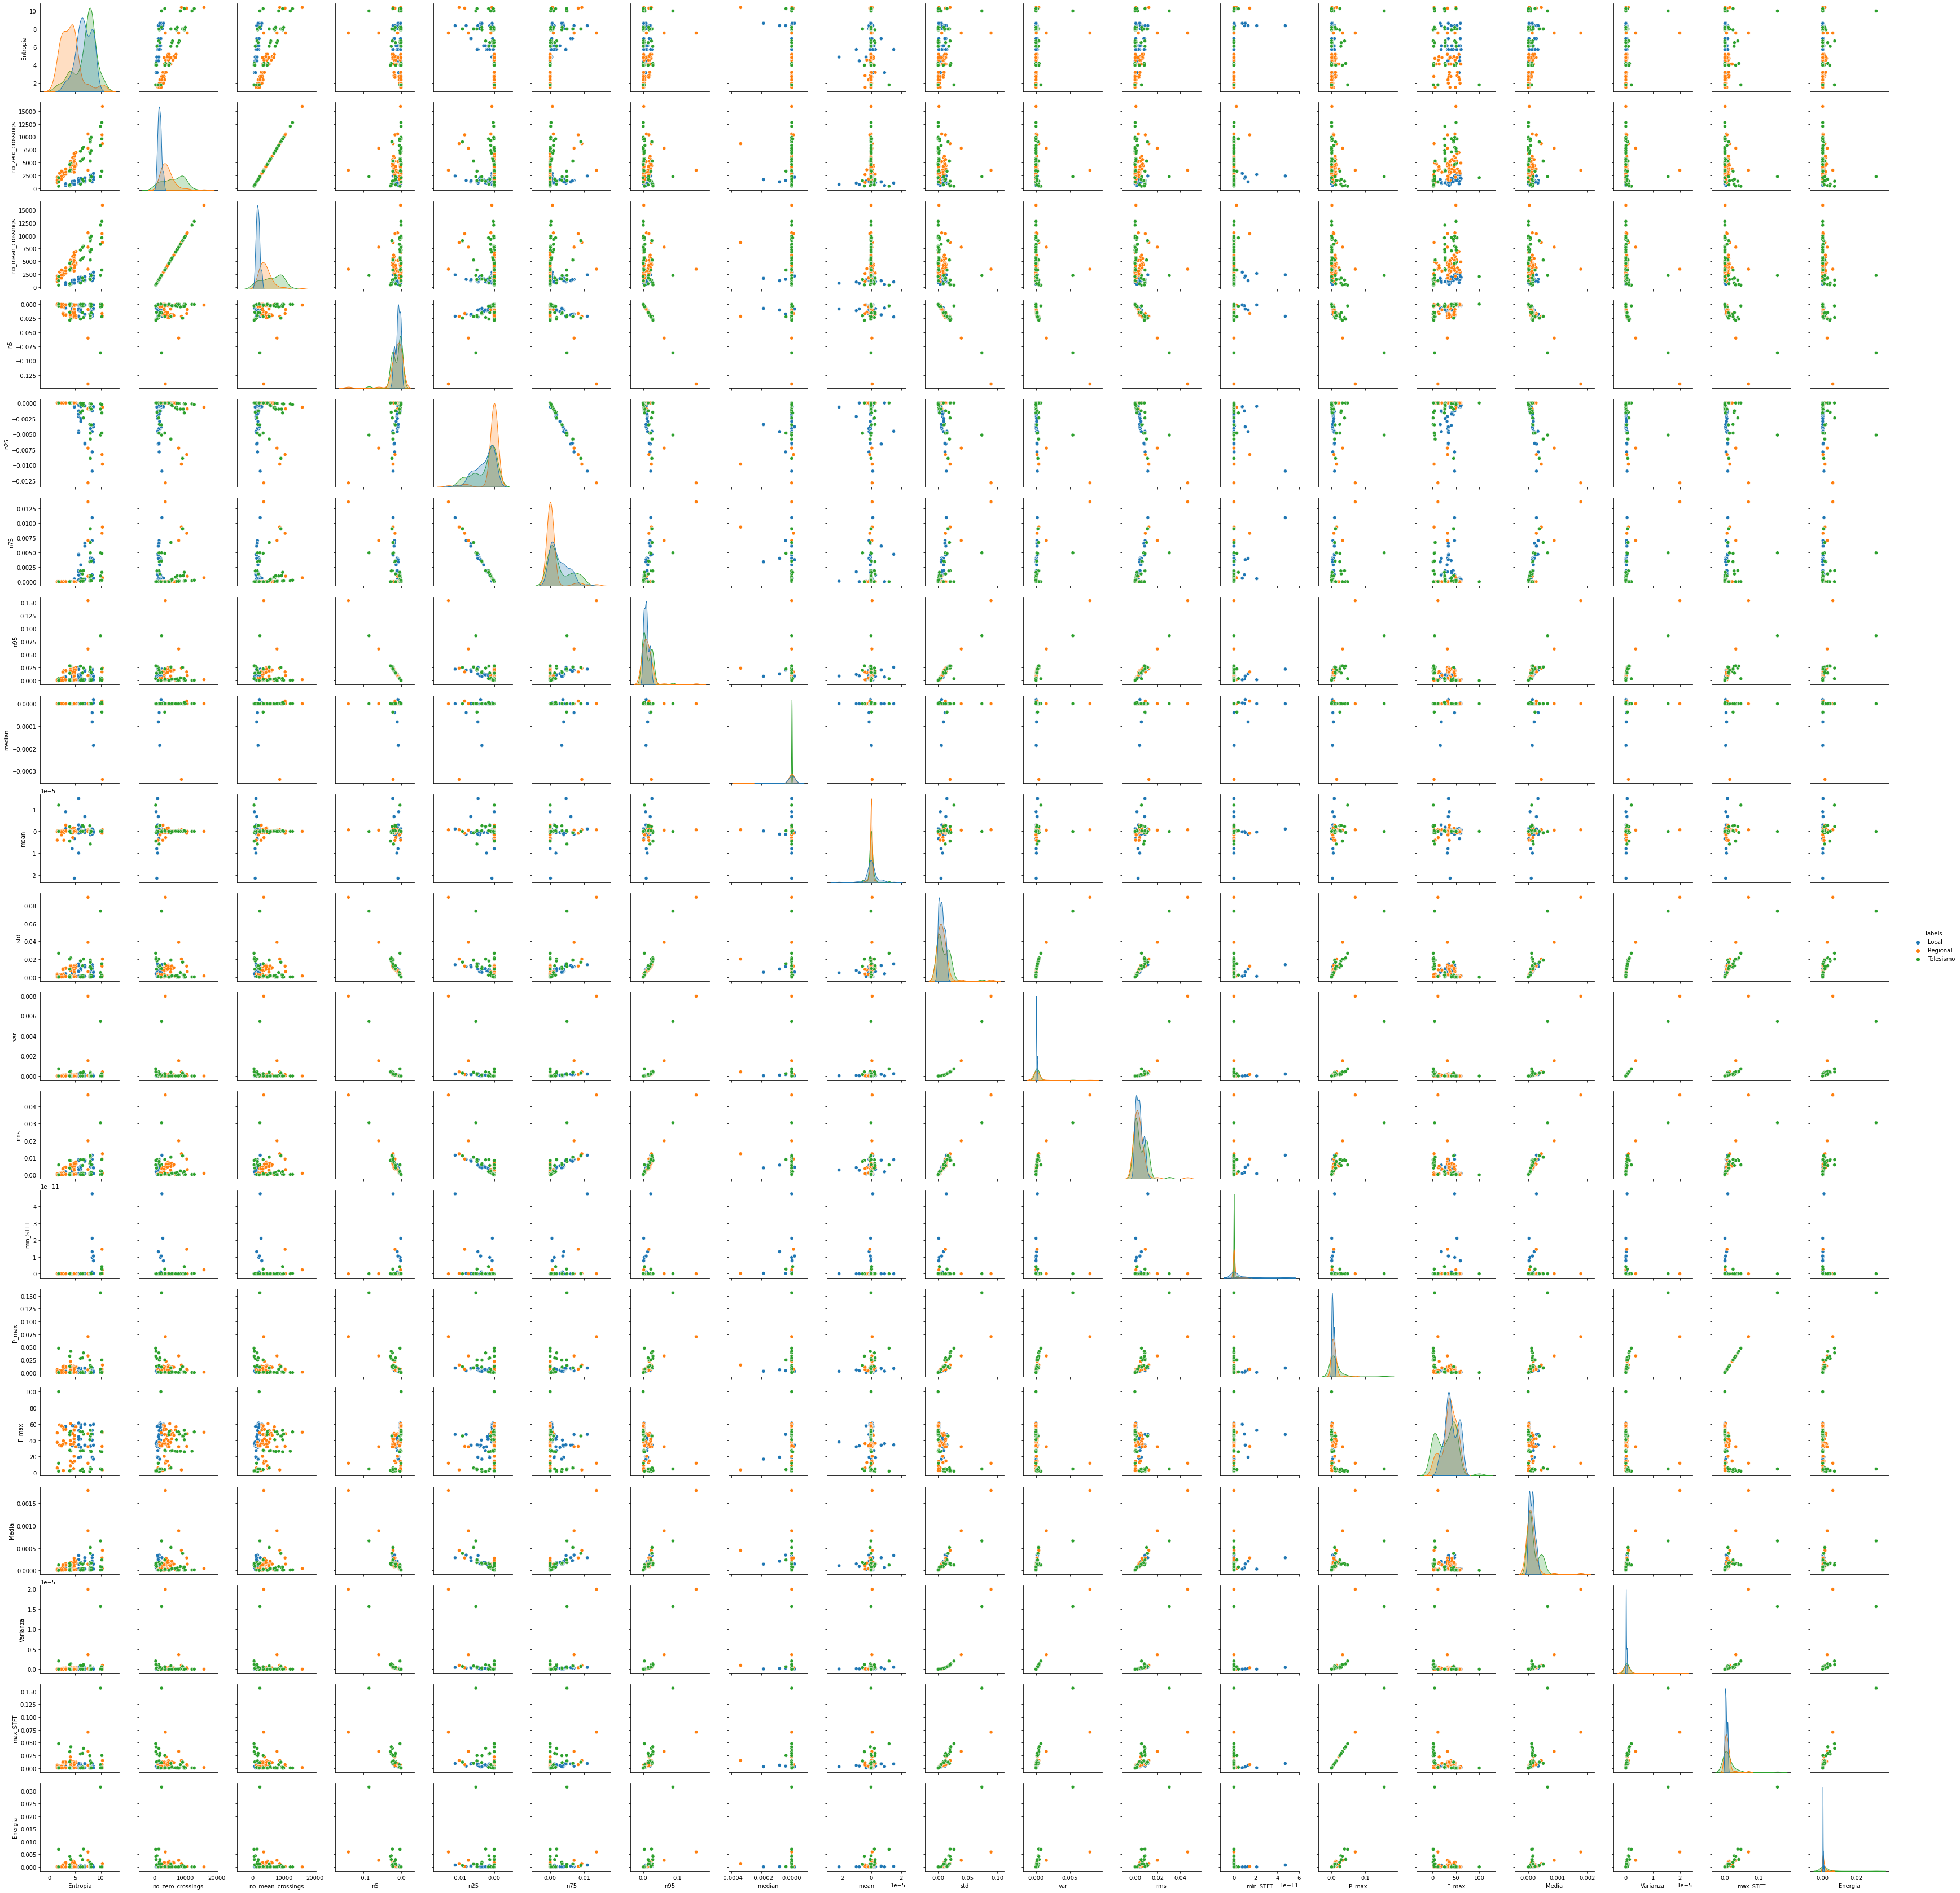

In [18]:
import seaborn as sns
sns.pairplot(dataframe, hue='labels', palette='tab10'); 

## **Análisis de resultados**
De las anteriores sub-gráficas se puede observar que las parejas de características permiten una diferenciación de los colores, en varias de las gráficas se nota como los datos de un mismo color se agrupan todos, aunque traslapándose con alguno de los otros tipos de datos. Por lo que, la separación entre tipo de datos no es completa, sin embargo, la agrupación de todos los datos de una misma etiqueta permite identificar más fácilmente el tipo de señal al que pertenecen, a diferencial de los datos que se observan dispersos y traslapados con los demás tipos de datos. 

Por ejemplo, lo anterior se puede observar en las características de **no_mean_crossings vs Entropia** y  **no_zero_crossings vs Entropia**:

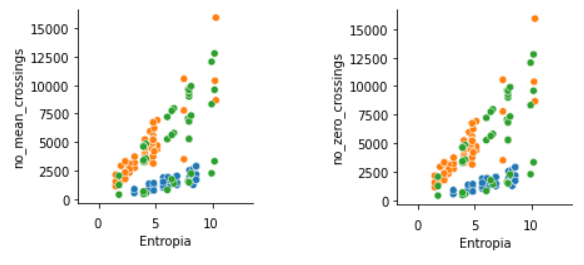

En estas 2 gráficas se puede observar que las etiquetas de color naranja y azul están agrupadas y separadas entre sí, y las etiquetas verdes están dispersas y traslapadas con las etiquetas naranjas y azules. Este patrón es interesante y permite clasificar algunas de las etiquetas por características.

En general, en muchas de las sub-gráficas se puede apreciar este tipo de patrón, donde al menos un grupo de colores pertenecientes a la misma etiqueta se agrupan y se diferencian de los demás colores. Pero, por otro lado, la caracterización de estas señales sigue siendo difícil de analizar, ya que no se detecta una diferenciación marcada entre las etiquetas y que no se traslapen entre sí.

## **Conclusiones**


*  De este ltrabajo se pudo comprender la extracción de características de una señal, y utilizar estas características para identificar el tipo de señal. Aunque se tenían 19 características, no todas permitían identificar de manera clara a qué señal correspondían, pero por ejemplo, la entropía, el número de cruces por cero y el número de cruces por la media, fueron las que permitieron un mayor análisis, ya que se podían observar grupos marcados de datos lo que permitía diferenciar las etiquetas para las 3 señales, y en caso de que se reciba una señal desconocida poderla categorizar según los valores de estas características.

* Del proceso de extracción de características y su respectiva visualización por medio de Seaborn, se pudo notar que si bien no permiten una agrupación completamente marcada, si se evidencia cierta tendencia que permitiría una discriminación de los datos entre los tres tipos de señales; cabe aclarar que, dicha tendencia se pudo observar para ciertos pares de características, no en todo el conjunto de las mismas.

* En la extracción de características de señales sísmicas, es importante considerar la selección de las características que proporcionan la información más relevante para el análisis. Si bien es deseable tener una amplia variedad de características para un análisis exhaustivo, es necesario tener en cuenta el impacto en la eficiencia computacional y la visualización de los resultados. El cálculo de múltiples características puede ralentizar el procesamiento y la visualización de datos, y en algunos casos, dificultar la interpretación de los resultados. Por lo tanto, es esencial identificar las características críticas y relevantes para el análisis en cuestión y optimizar su selección y cálculo en función de los recursos disponibles y los objetivos del estudio.

* La caracterización de señales de datos reales puede ser difícil debido a la complejidad y la falta de diferenciación marcada en los patrones observados. En este caso, La IA puede ayudar a identificar patrones y tendencias en los datos que no son fácilmente detectables a simple vista, lo que permite un análisis más detallado y riguroso. Al utilizar modelos de IA en el análisis de señales sísmicas, podemos obtener información valiosa sobre la naturaleza y el comportamiento de los eventos sísmicos, lo que puede mejorar significativamente nuestra comprensión de estos fenómenos y, en última instancia, ayudar en la prevención y mitigación de riesgos sísmicos.


